# Exploratory Data Analysis

In [921]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [922]:
df = pd.read_csv('Data/term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [923]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


Features look to have no missing values. Below I will change the 'object' types to 'category' for memory purposes

In [925]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.9 MB


## Categorical Variables

In [926]:
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"Column name: {col}")
        print(f"Unique column values: {df[col].unique()}")
        print('*'*40)
        print()


Column name: job
Unique column values: ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
****************************************

Column name: marital
Unique column values: ['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
****************************************

Column name: education
Unique column values: ['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
****************************************

Column name: default
Unique column values: ['no', 'yes']
Categories (2, object): ['no', 'yes']
****************************************

Column name: housing
Unique column values: ['yes', 'no']
Categories (2, object): ['no', 'yes']
***************

In [927]:
for col in df.columns:
    if col=='default' or col=='housing' or col=='loan' or col=='y':
        df.replace({col: {'yes': '1', 'no': '0'}}, inplace=True)
        df[col] = df[col].astype('int32')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [928]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  int32   
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  int32   
 7   loan       40000 non-null  int32   
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  int32   
dtypes: category(5), int32(4), int64(5)
memory usage: 2.3 MB


In [929]:
        
cat_list = [col for col in df.columns if df[col].dtype == 'category']
print(f"Categorical variables: {cat_list}")
num_list = [col for col in df.columns if df[col].dtype != 'category']
print(f"Numerical variables:   {num_list}")

Categorical variables: ['job', 'marital', 'education', 'contact', 'month']
Numerical variables:   ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'y']


In [930]:
######## HELPER Function that makes countplot of categorical features

def make_count_plot(df, feature_to_count=str, hue=None):
    sns.countplot(data=df, x=feature_to_count, hue=hue)
    plt.xlabel(f"{feature_to_count.title()} counts")
    plt.xticks(rotation=45)
    plt.show()

### Job

In [931]:
df['job'].value_counts(normalize=True)

job
blue-collar     0.23
management      0.20
technician      0.17
admin           0.11
services        0.10
retired         0.04
self-employed   0.04
entrepreneur    0.04
unemployed      0.03
housemaid       0.03
student         0.01
unknown         0.01
Name: proportion, dtype: float64

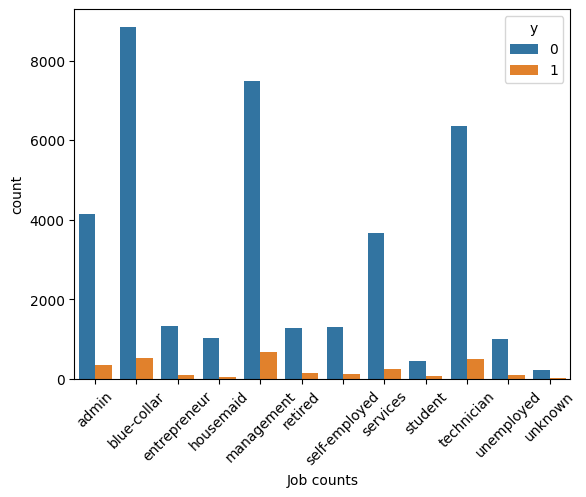

In [932]:
make_count_plot(df, 'job', hue='y')

### Marital

In [933]:
df['marital'].value_counts(normalize=True)

marital
married    0.61
single     0.27
divorced   0.12
Name: proportion, dtype: float64

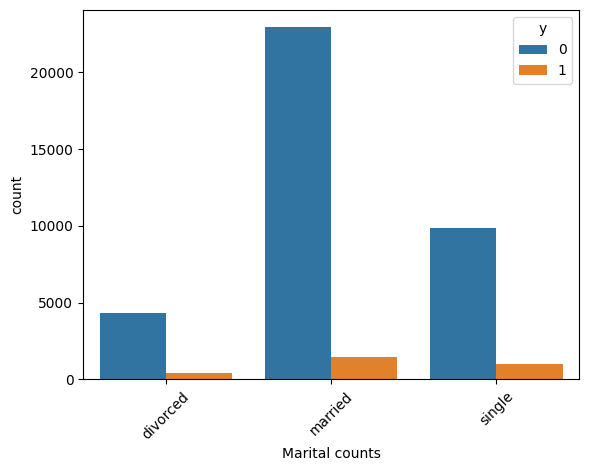

In [934]:
make_count_plot(df, 'marital', 'y')

### Education

In [935]:
df['education'].value_counts(normalize=True)

education
secondary   0.52
tertiary    0.28
primary     0.16
unknown     0.04
Name: proportion, dtype: float64

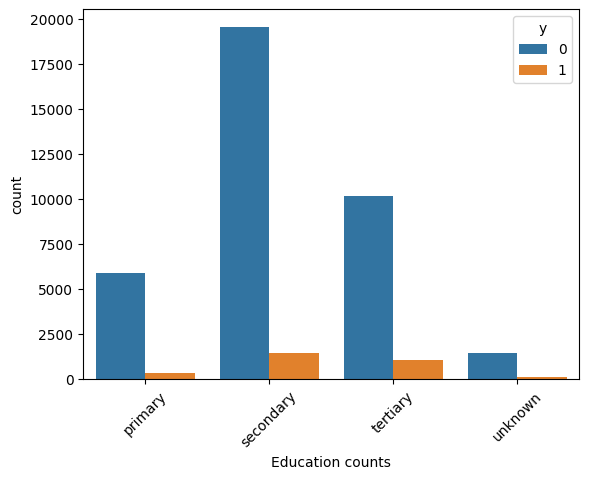

In [936]:
make_count_plot(df, 'education', 'y')

### Contact

In [937]:
df['contact'].value_counts(normalize=True)

contact
cellular    0.62
unknown     0.32
telephone   0.06
Name: proportion, dtype: float64

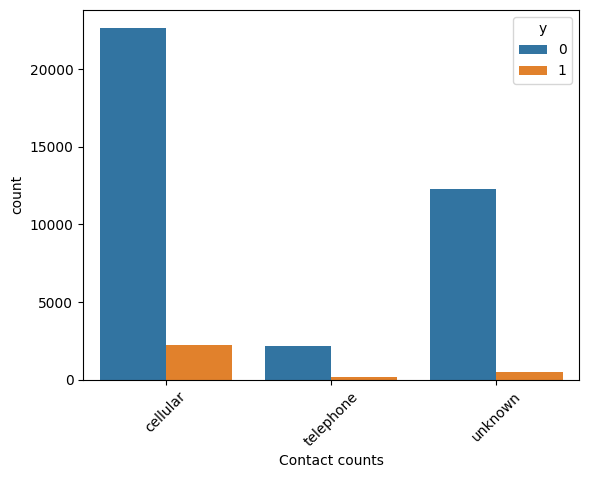

In [938]:
make_count_plot(df, 'contact', 'y')

### Month

In [939]:
df['month'].value_counts(normalize=True)

month
may   0.34
jul   0.16
aug   0.13
jun   0.12
nov   0.09
apr   0.07
feb   0.06
jan   0.03
mar   0.01
oct   0.00
dec   0.00
Name: proportion, dtype: float64

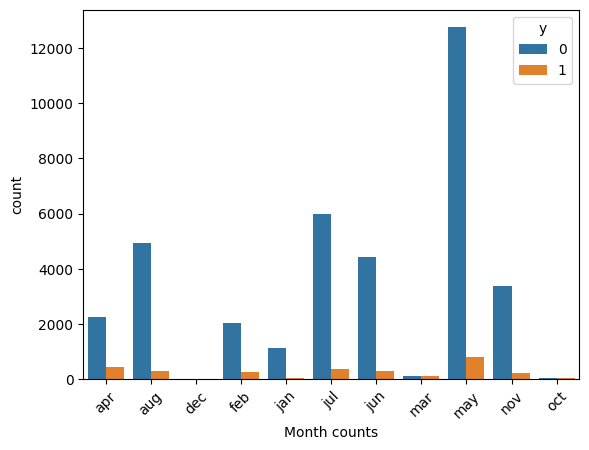

In [940]:
make_count_plot(df, 'month', 'y')

## Numerical Variables

In [941]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,y
count,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,0.02,1274.28,0.60,0.17,16.02,254.82,2.88,0.07
std,9.64,0.14,2903.77,0.49,0.38,8.28,259.37,3.24,0.26
min,19.00,0.00,-8019.00,0.00,0.00,1.00,0.00,1.00,0.00
25%,33.00,0.00,54.00,0.00,0.00,8.00,100.00,1.00,0.00
50%,39.00,0.00,407.00,1.00,0.00,17.00,175.00,2.00,0.00
75%,48.00,0.00,1319.00,1.00,0.00,21.00,313.00,3.00,0.00
max,95.00,1.00,102127.00,1.00,1.00,31.00,4918.00,63.00,1.00


From the descriptive statistics above we can conclude:
* The mean and median age is roughly the same (mean ~40, median =39)
* It looks like there are very few people who have credit in default ~2%
* The mean and median of balances are ~1274.28 and ~407.00, respectively. Balance looks to have a negative value which needs to be looked at
* Most people have a house loan ~60%
* Most people do not have a personal loan ~17%
* The day feature is the last day of the month that the customer was contacted and we can see that the mean and median are roughly the same; between 16 and 17
* The duration feature is the duration of the customers last call in seconds (I will change that to minutes below) which looks to average out around 254 sec. or ~4.5 minutes/call
* Finally, the campaign feature is the amount of times the bank contacted each customer. The average times that a customer was contacted looks to be just under 3, but with a median of 2 

In [942]:
df['default'].value_counts(normalize=True)

default
0   0.98
1   0.02
Name: proportion, dtype: float64

In [943]:
df['housing'].value_counts(normalize=True)

housing
1   0.60
0   0.40
Name: proportion, dtype: float64

In [944]:
df['loan'].value_counts(normalize=True)

loan
0   0.83
1   0.17
Name: proportion, dtype: float64

### Negative Balances

In [986]:
negative_balance = df[df['balance']<0]
neg_bal_percentage = negative_balance.shape[0]/df.shape[0]

print(f"Percentage of people with negative balance: {neg_bal_percentage*100}%")

# negative_balance.head()

Percentage of people with negative balance: 9.3275%


In [985]:
neg_bal_loan = negative_balance[(negative_balance['loan']==1)]
print(f"Percentage of customers with negative balances who have a loan: {round(neg_bal_loan.shape[0]/negative_balance.shape[0]*100, 2)}%")

# neg_bal_loan.head()

Percentage of customers with negative balances who have a loan: 32.3%


In [984]:
neg_bal_default = negative_balance[negative_balance['default']==1]
print(f"Percentage of customers with negative balances who have credit in default: {round(neg_bal_default.shape[0]/negative_balance.shape[0], 2)}%")

Percentage of customers with negative balances who have credit in default: 0.12%


In [981]:
print(negative_balance['y'].value_counts(normalize=True))
negative_bal_customers_positive = round(.05*negative_balance.shape[0]/df.shape[0]*100, 2)

print(f"\nPeople with a negative account balance make up 5% of those customers to subscribe to the term deposit product.\nOverall, they make up {negative_bal_customers_positive}%")

y
0   0.95
1   0.05
Name: proportion, dtype: float64

People with a negative account balance make up 5% of those customers to subscribe to the term deposit product.
Overall, they make up 0.47%


In [ ]:
################# create a column that is duration_in_minutes...for interpretabilities sake #############

df['duration_in_minutes'] = df['duration'] / 60

num_list.remove('duration')
num_list.append('duration_in_minutes')
# print(df[['duration']].head())
# print(df[['duration_in_minutes']].head())

df.drop(columns='duration', axis=1, inplace=True)

### y (target feature)

In [ ]:
df['y'].value_counts(normalize=True)

y
0   0.93
1   0.07
Name: proportion, dtype: float64

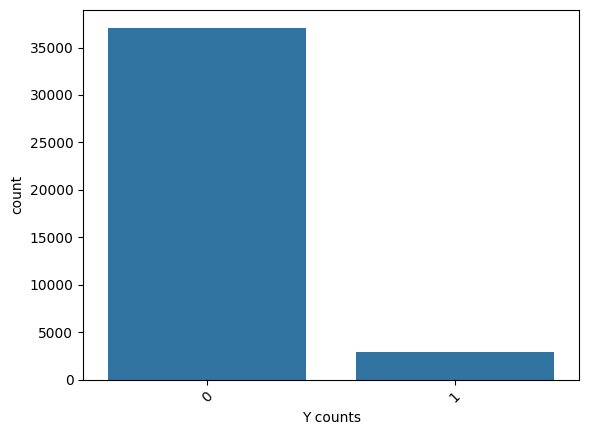

In [ ]:
make_count_plot(df, 'y')

We can see that the target feature that we are trying to predict is heavily skewed towards the negative class or the class of people that have not subscribed to a term deposit product.

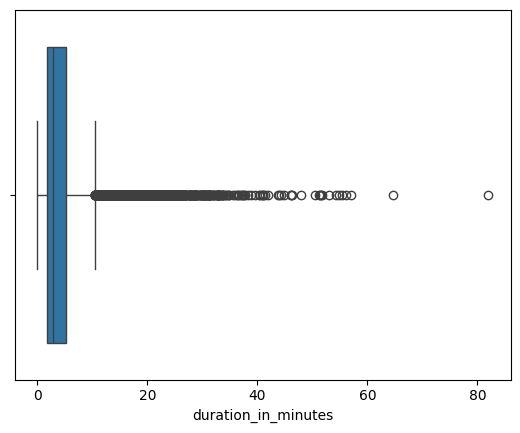

In [ ]:
sns.boxplot(data=df, x='duration_in_minutes')
plt.show()

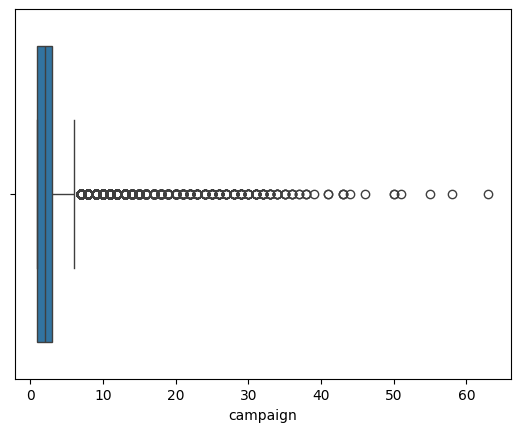

In [ ]:
sns.boxplot(data=df, x='campaign')
plt.show()

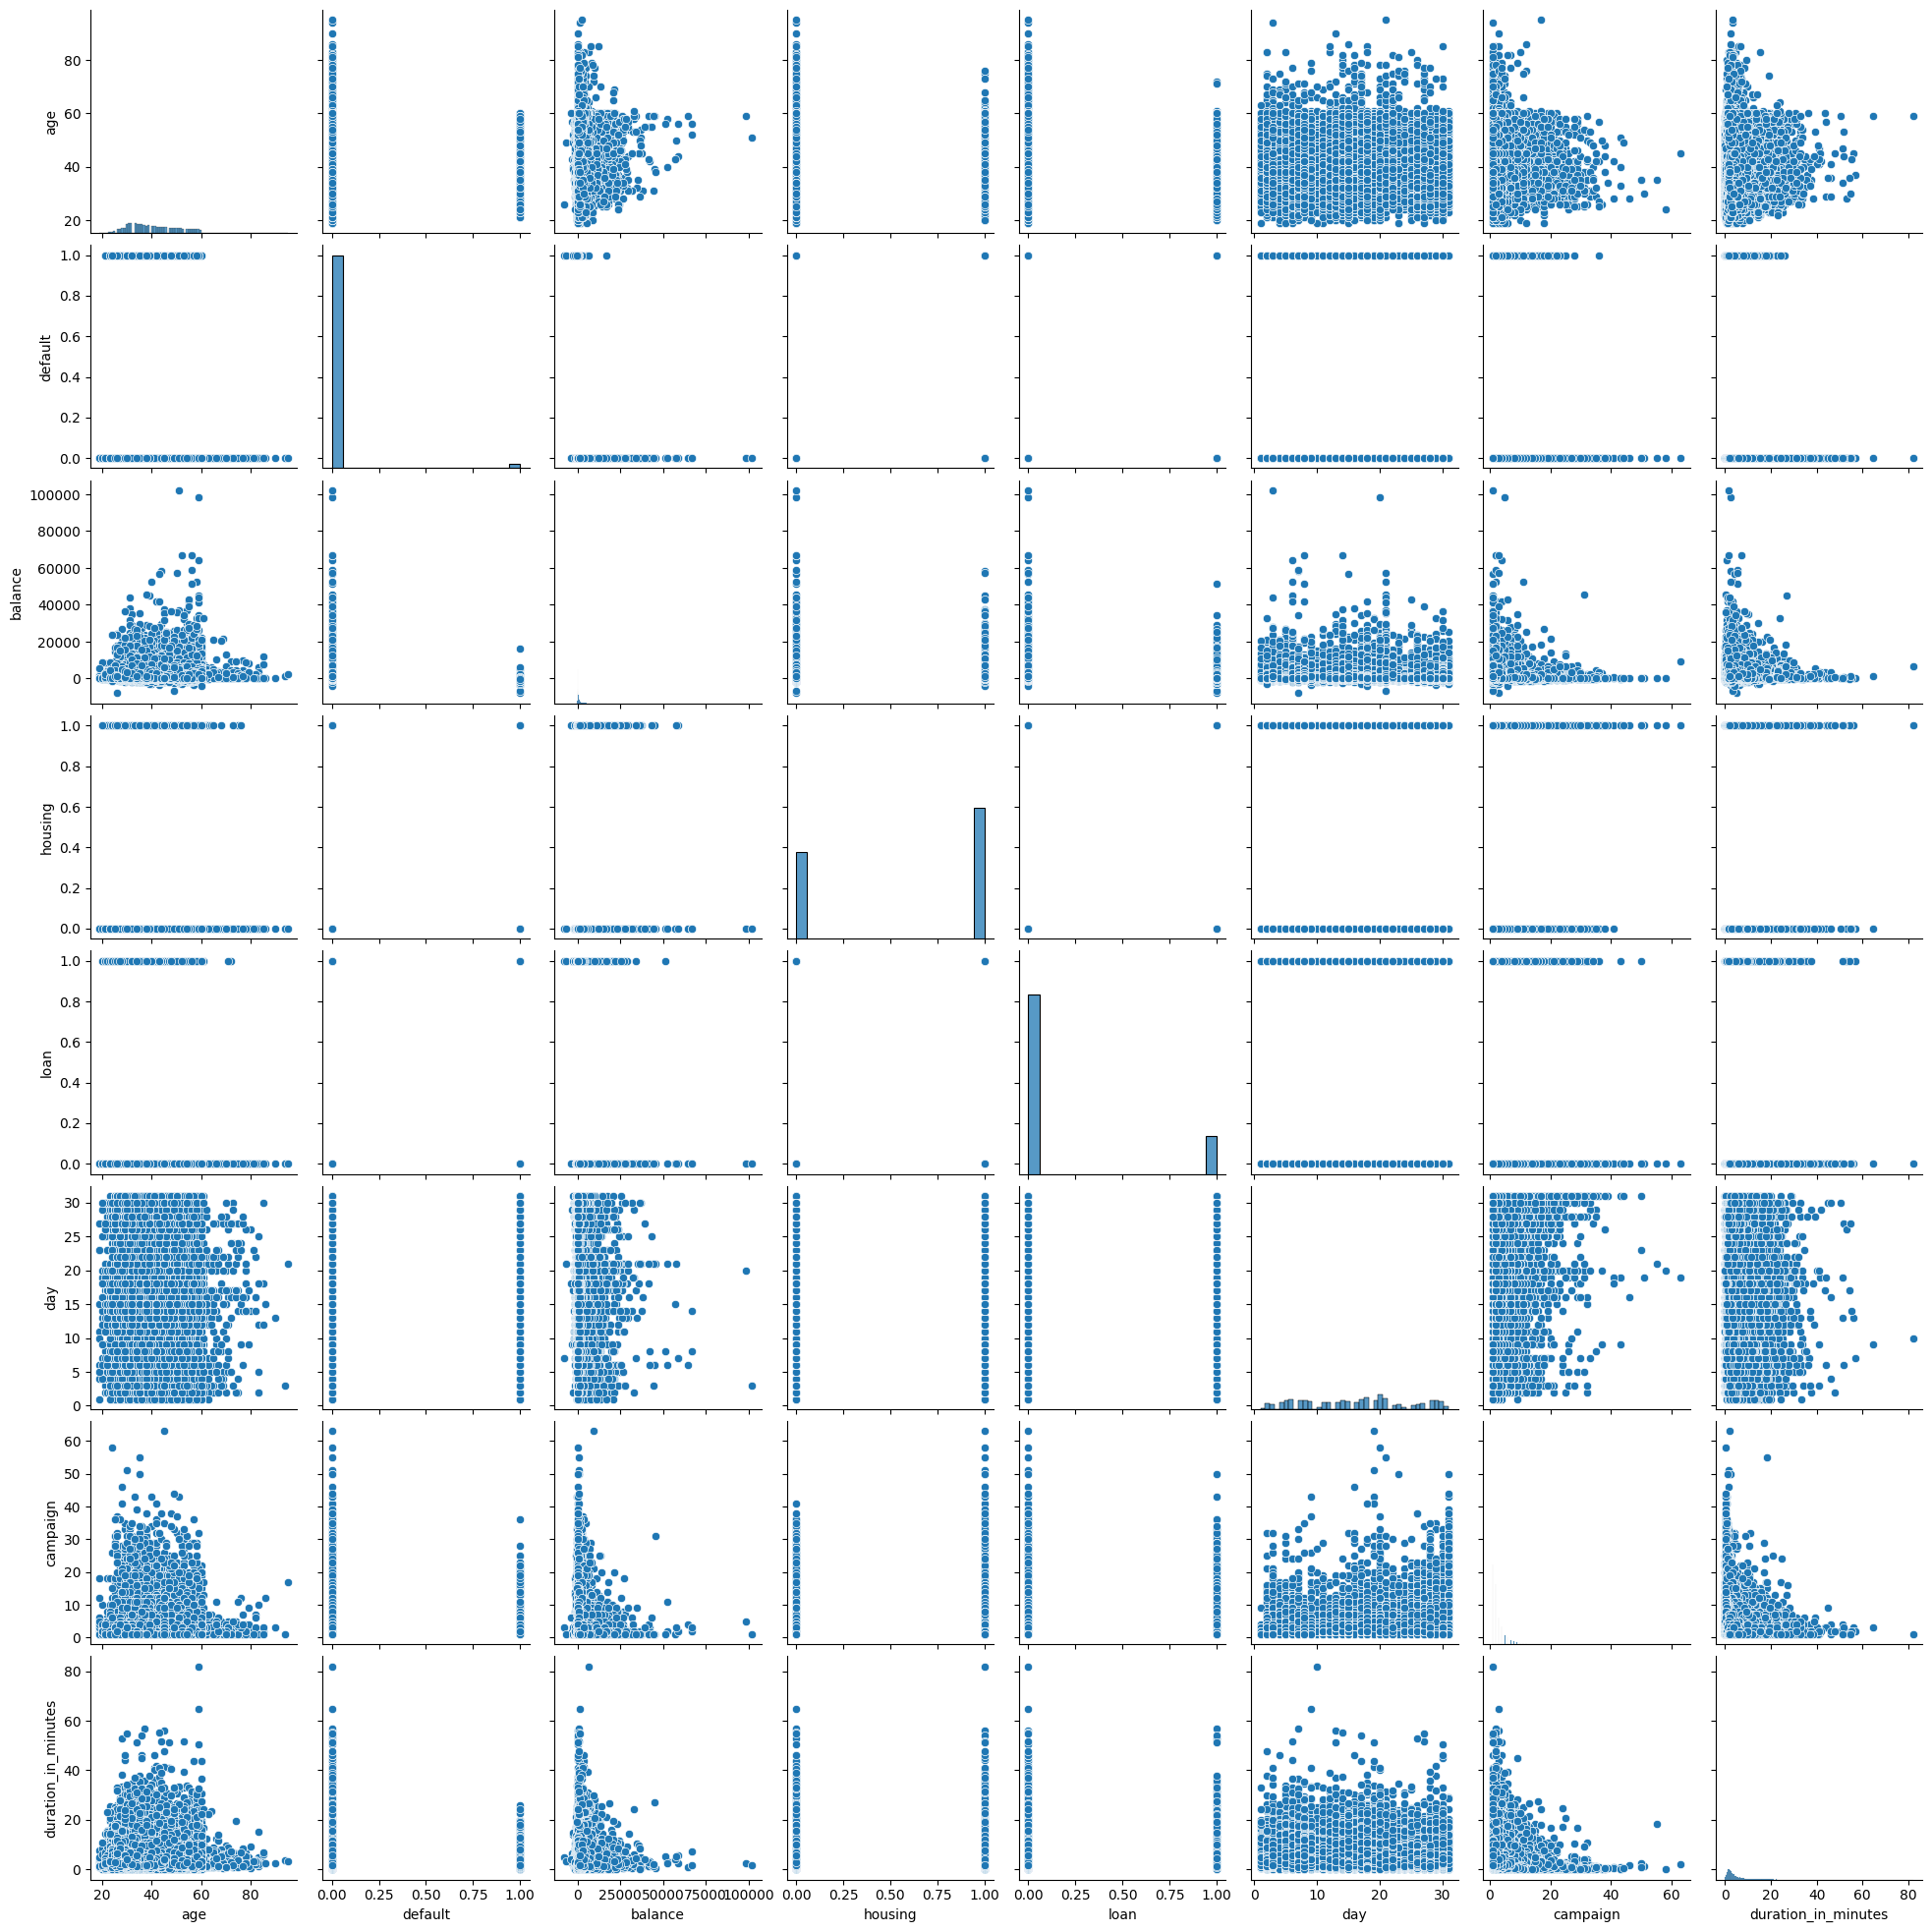

In [ ]:
sns.pairplot(data=df[num_list].drop(columns='y', axis=1))
plt.show()

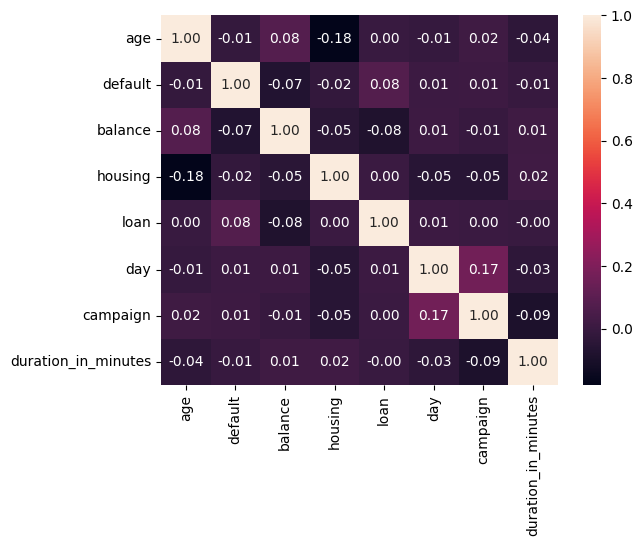

In [ ]:
sns.heatmap(data=df[num_list].drop(columns='y', axis=1).corr(), annot=True, fmt='.2f')
plt.show()

From the two graphs above we can see that there are little to no linear correlations between features. The pairplot does show a few exponential correlations between duration_in_minutes and balance, campaign and balance, and campaign and duration_in_minutes.

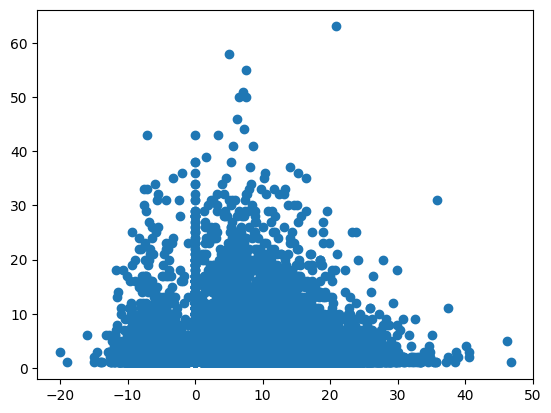

In [ ]:
plt.scatter(x=np.cbrt(df['balance']), y=df['campaign'])
# sns.scatterplot(data=df, x='balance', y='campaign')
plt.show()

If we transform the balance column by taking the cubed root we can see that the people with negative balances as well as the people with the biggest balances are the customers to get contacted the least during the bank's campaign. 

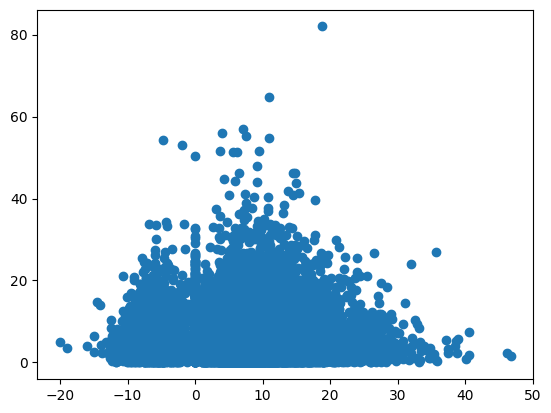

In [ ]:
plt.scatter(x=np.cbrt(df['balance']), y=df['duration_in_minutes'])
plt.show()

The same can be said for the duration_in_minutes. The people with low balances and the highest balances are likely to have shorter duration calls from the bank.

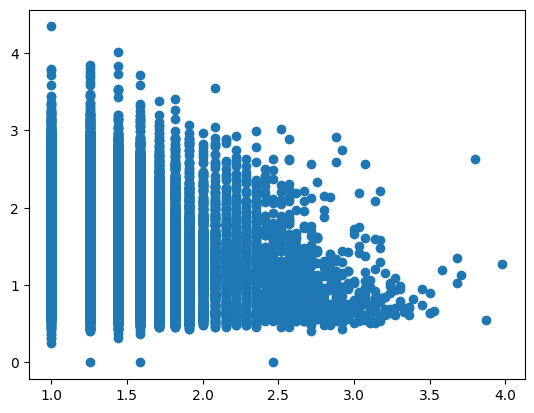

In [ ]:
plt.scatter(x=np.cbrt(df['campaign']), y=np.cbrt(df['duration_in_minutes']))
plt.show()

As with the duration_in_minutes as a function of campaign, we can see that the more the bank contacted a person the less they were likely to be on the phone with the person. This makes for wondering if we need all three of these features or if one or two will do when we start the training process.

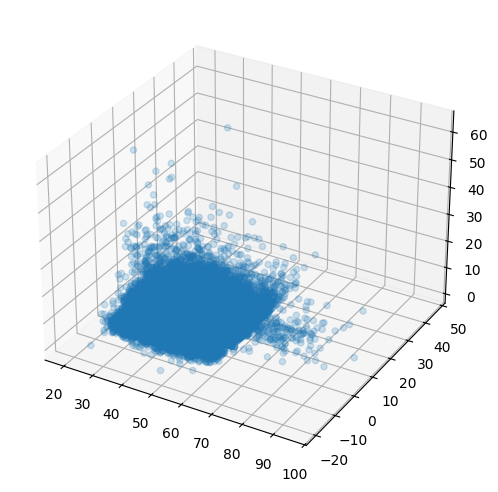

In [991]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(projection='3d')

croot_bal = [np.cbrt(a) for a in df['balance']]

ax.scatter(df['age'], croot_bal, df['campaign'], alpha=.2)
plt.show()

This 3D scatter plot of age to balance to campaign shows in another way that the people in the age range of 20-60 with a balance of ~-1,000$-64,000$ will be contacted more than those people on the other ends of the age and balance distributions.

## Positive Class Exploration
* the customers who HAVE subsribed to a term deposit product

In [ ]:
positive_y_df = df[df['y']>0]
positive_y_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,duration_in_minutes
83,59,admin,married,secondary,0,2343,1,0,unknown,5,may,1,1,17.37
86,56,admin,married,secondary,0,45,0,0,unknown,5,may,1,1,24.45
87,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1,1,23.15
129,55,services,married,secondary,0,2476,1,0,unknown,5,may,1,1,9.65
168,54,admin,married,tertiary,0,184,0,0,unknown,5,may,2,1,11.22


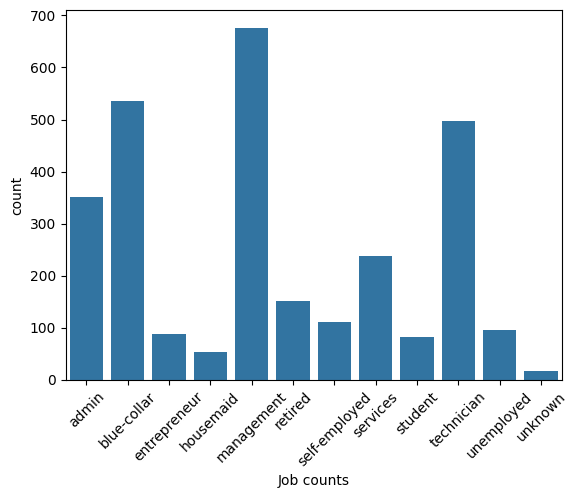

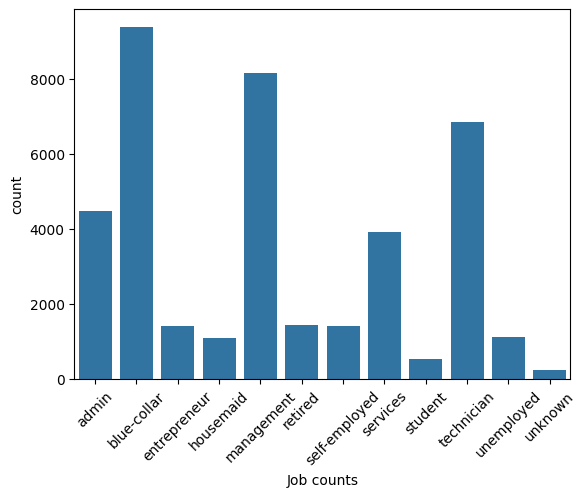

In [ ]:
make_count_plot(positive_y_df, 'job')
make_count_plot(df, 'job')

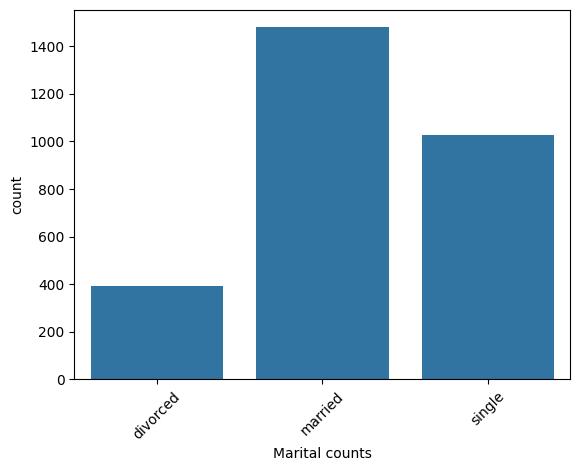

In [ ]:
make_count_plot(positive_y_df, 'marital')

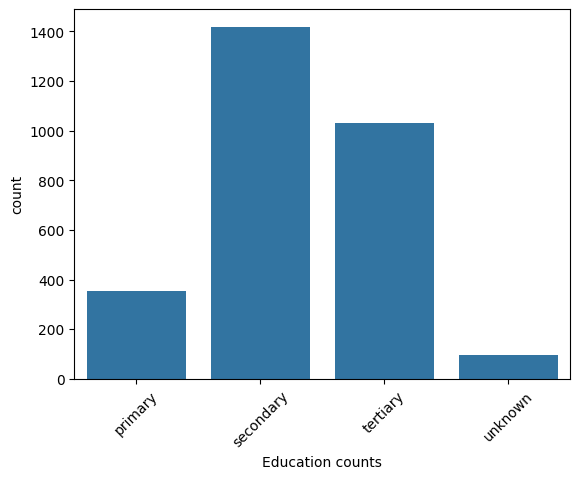

In [ ]:
make_count_plot(positive_y_df, 'education')

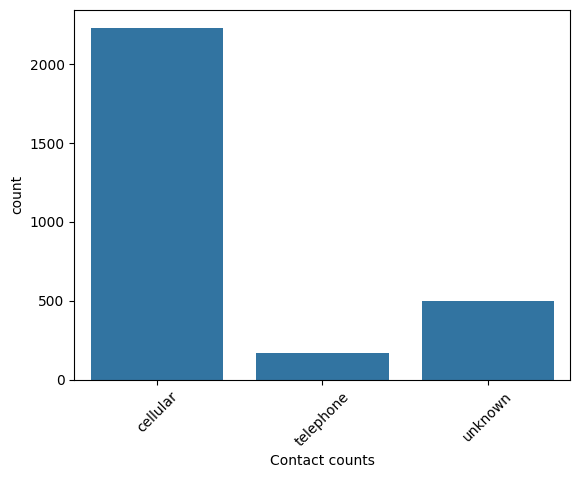

In [ ]:
make_count_plot(positive_y_df, 'contact')

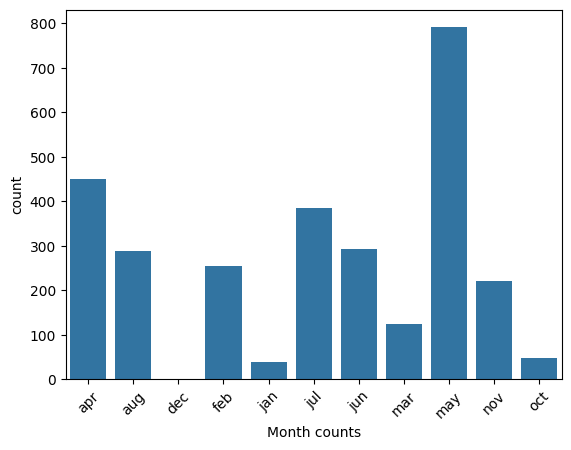

In [ ]:
make_count_plot(positive_y_df, 'month')

Subscribers looked to have primarily:
* been in the management, blue-collar, or technician jobs
* been married, or single
* have a secondary or tertiary education level
* been contacted by cellular device
* been last contacted during the month of May 

In [989]:
positive_y_df.describe()

,age,default,balance,housing,loan,day,campaign,y,duration_in_minutes
count,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00
mean,39.84,0.02,1588.50,0.51,0.13,15.83,2.41,1.00,11.38
std,11.00,0.13,2924.89,0.50,0.34,8.56,2.31,0.00,7.19
min,19.00,0.00,-3058.00,0.00,0.00,1.00,1.00,1.00,0.13
25%,31.00,0.00,141.00,0.00,0.00,8.00,1.00,1.00,6.07
50%,37.00,0.00,620.00,1.00,0.00,16.00,2.00,1.00,10.48
75%,47.00,0.00,1820.50,1.00,0.00,22.00,3.00,1.00,15.22
max,95.00,1.00,45248.00,1.00,1.00,31.00,32.00,1.00,64.68


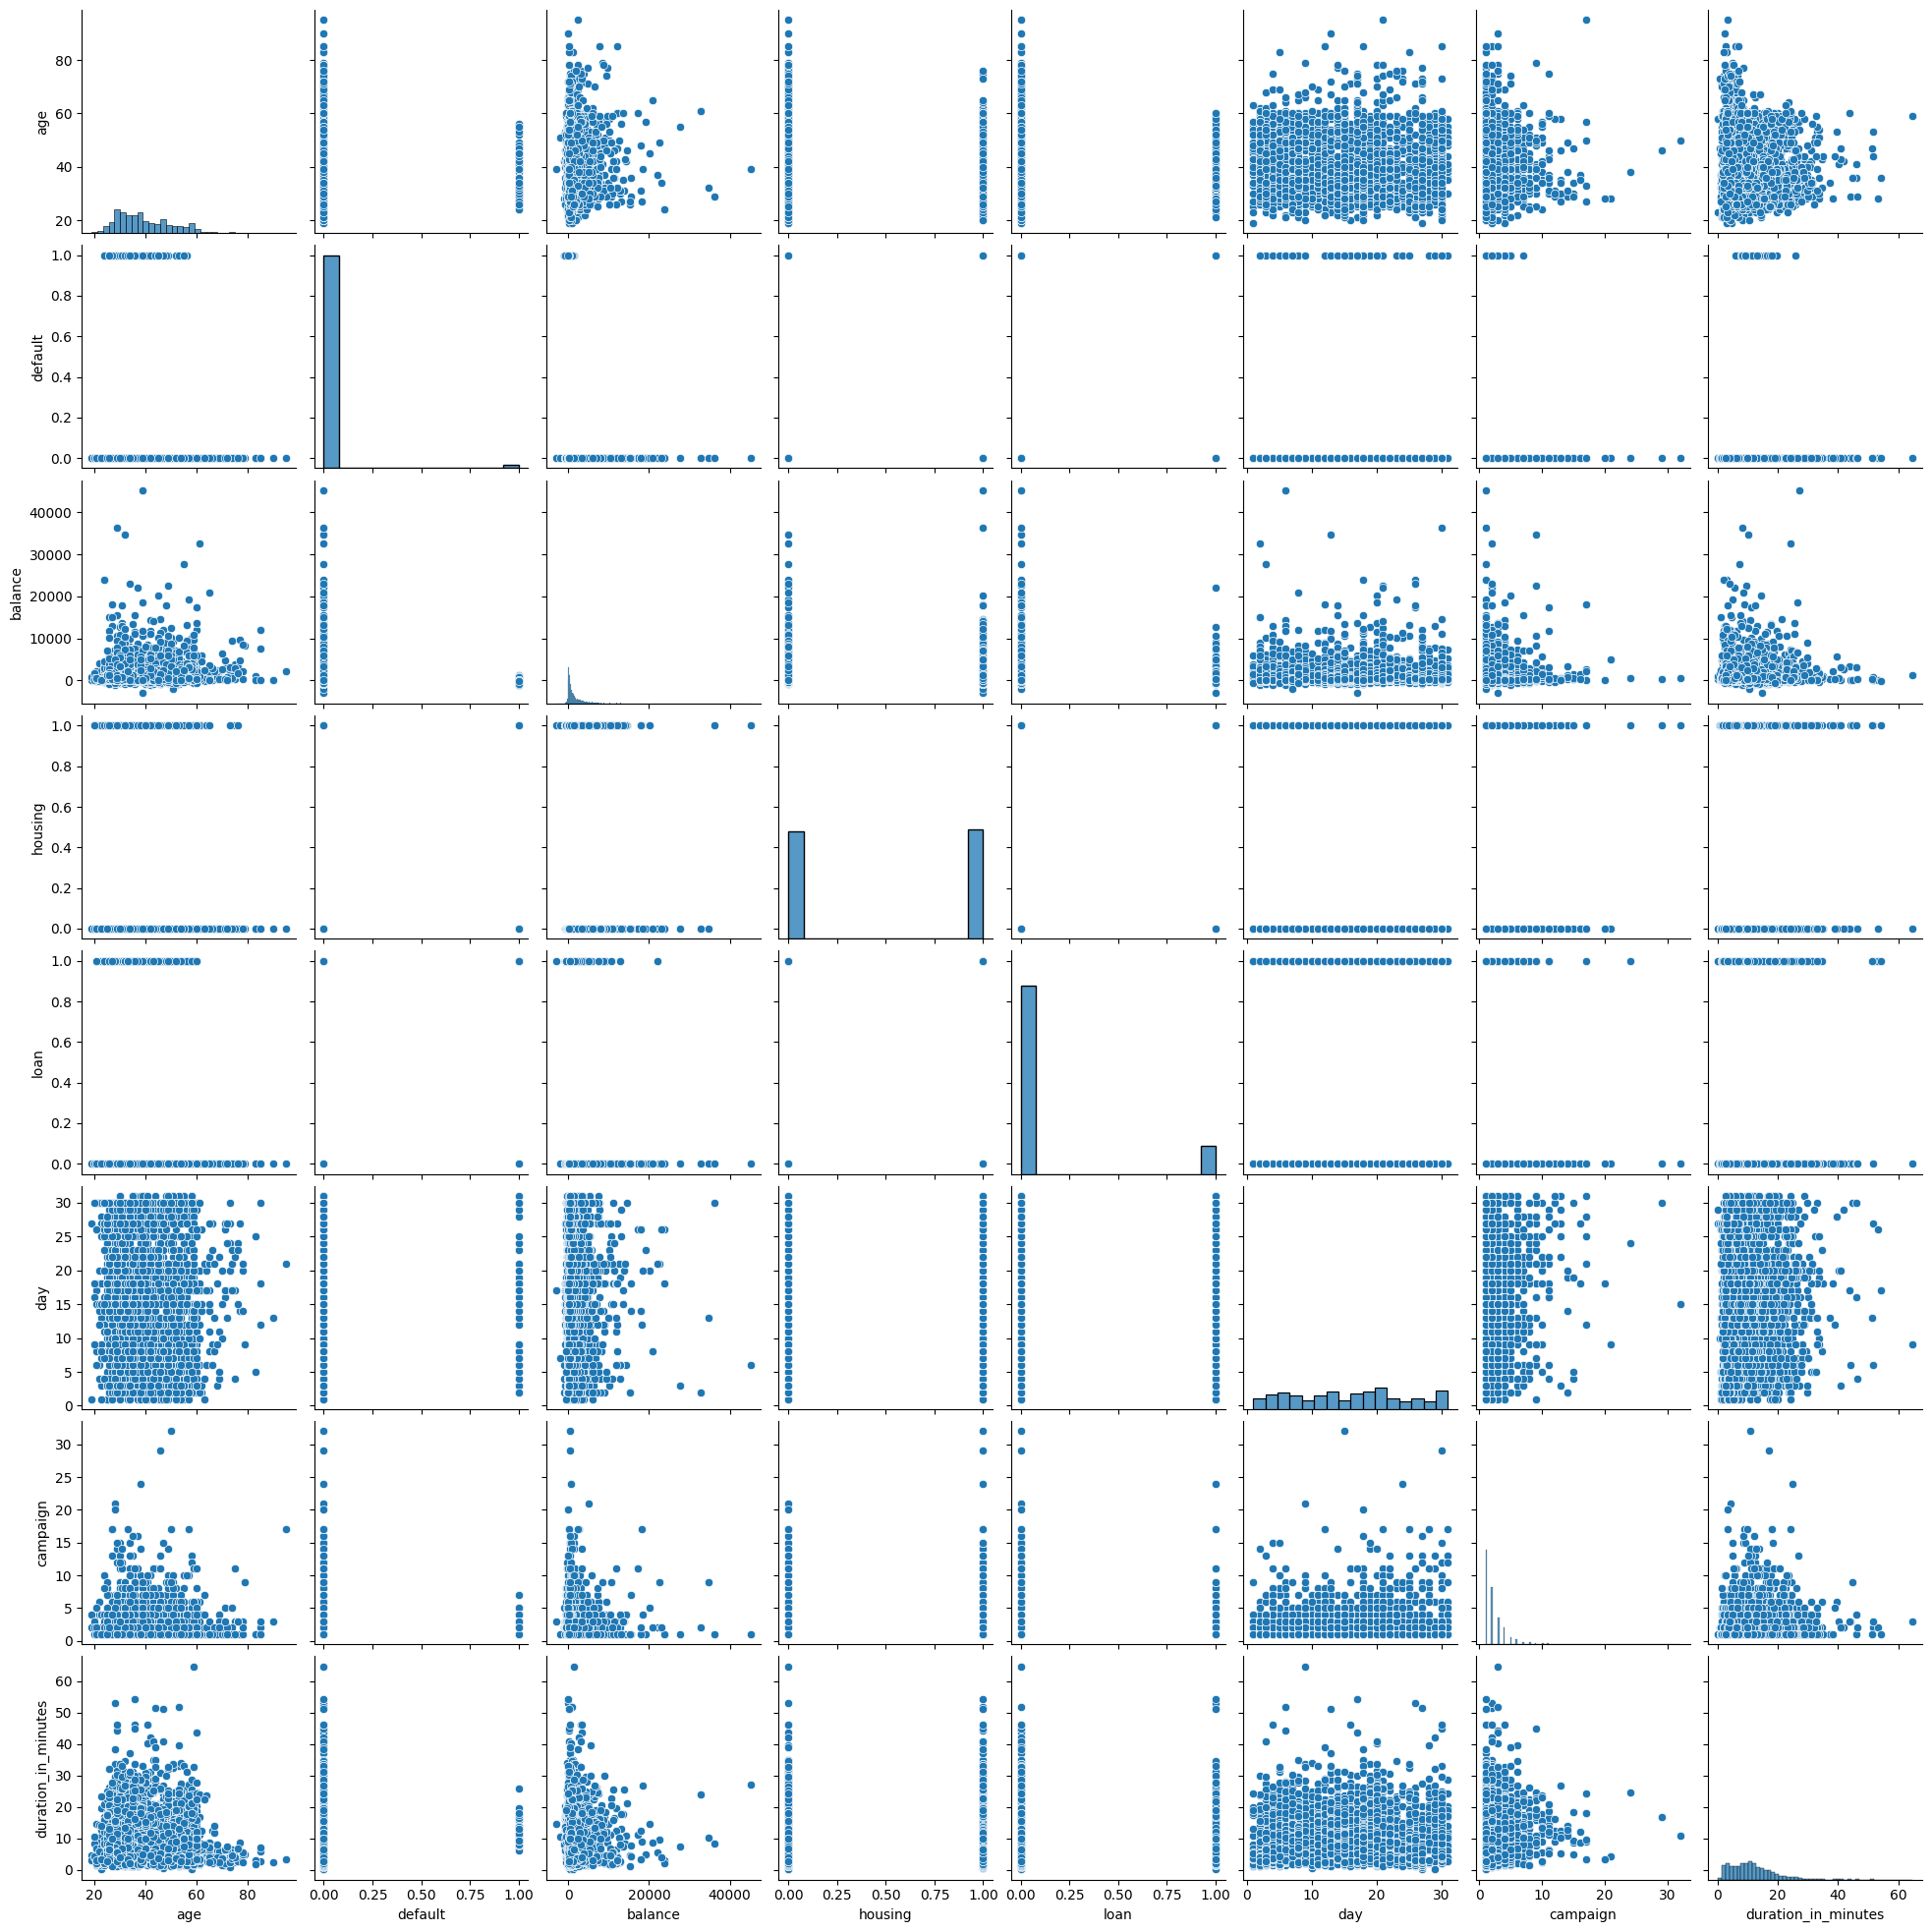

In [988]:
sns.pairplot(data=positive_y_df.drop(columns='y', axis=1))

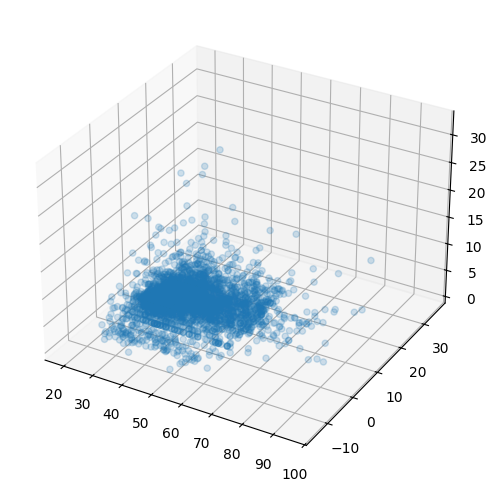

In [993]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(projection='3d')

croot_bal = [np.cbrt(bal) for bal in positive_y_df['balance']]

ax.scatter(positive_y_df['age'], croot_bal, positive_y_df['campaign'], alpha=.2)

plt.show()

Like the 3D scatterplot in the previous section, of the people who bought the term deposit product the people who were contacted the most look to be those who had balances over $1,000 and between 20 and 40 years of age. 

## Finalized Dataframe
* Convert dataframe to parquet for modeling stage

In [ ]:
import os
from pathlib import Path

directory_path = Path('Data')
file_path = 'model-ready-term-deposit-marketing-2020.parquet'
full_path = os.path.join(directory_path, file_path)

df.to_parquet(full_path)